<a href="https://colab.research.google.com/github/hucarlos08/Geo-ML-AT/blob/main/MarkovChains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markov chains

## Markov asssumption

Let's assume that $\mathbf{x_t}$ encompasses all the essential information about the system's state. This suggests that $\mathbf{x_t}$ is a sufficient statistic for forecasting the future based on the past, that is,
$$
p(\mathbf x_{t+\tau} | \mathbf x_t, \mathbf x_{1:t-1}) = p(\mathbf x_{t+\tau} | \mathbf x_t),
$$
for any $\tau \geq 0$. This is called the **Markov assumption**. In this case, we can write the joint distribution for any finite length sequence as follows:

$$
p(\mathbf x_{1:T}) = p(\mathbf x_1) \prod_{t=2}^{T} p(\mathbf x_t | \mathbf x_{t-1})
$$

Where:

- $p(\mathbf x_{1:T})$ is the joint distribution of the sequence from $ \mathbf x_1 $ to $ \mathbf x_T $.
- $p(\mathbf x_1)$ represents the initial distribution.
- $p(\mathbf x_t | \mathbf x_{t-1})$ is the transition probability from $ \mathbf x_{t-1}$ to $\mathbf x_t $.

This equation expresses that the likelihood of a specific sequence $\mathbf x_{1:T}$ is the product of the initial probability $p(\mathbf x_1)$ and all subsequent transition probabilities.

## Markov chains parametrization

### The main ideas:

1. **The conditional distribution $p(\mathbf x_t|\mathbf x_{t-1})$ is called the transition function, transition kernel, or Markov kernel."**
   
  In the context of Markov chains, this function gives the probability of moving from one state at time  $t-1$ to another state at time $t$. It's like asking: "Given that we're in state A right now, what's the probability of moving to state B next?"

2. **The conditional distribution over should stisfy the conditions $p(\mathbf x_t|\mathbf x_{t-1}) \geq 0 $ and $\int_{x \in X} p(\mathbf x_t = x|\mathbf x_{t-1}) \, dx = 1$.**
   
   This elaborates on the nature of the transition function. It clarifies two things:
   - The probabilities given by the transition function are non-negative.
   - The sum (or integral, in the continuous case) of probabilities transitioning from a given state $ \mathbf x_{t-1} $ to all possible states $\mathbf x_t $ is 1. This ensures that the transition probabilities are valid and that the system will transition to some state with certainty.

3. **If the transition function $p(\mathbf x_t|\mathbf x_{1:t-1})$ is independent of time, then the model is said to be homogeneous, stationary, or time-invariant.**
   
   - If the transition probabilities do not change over time (they're the same whether you're looking at time 2, time 10, or time 1000), then the model is termed homogeneous or time-invariant.
   
   - This means that we're using the same set of parameters to describe the system's behavior across different times. It's a form of simplification where you assume the system's behavior is consistent across time.
   
   - A benefit of the time-invariance assumption is that it limits the number of parameters we need. Without this assumption, we might need a different set of transition probabilities for every time step, which would quickly become unmanageable.

4. **If we assume discreted states, that is $X_t\in\{1,2,\dots, K\}$ we called finite-state Markov chain**.
  - Given the discrete number of states, our system's behavior is described as a "finite-state Markov chain." In other words, it's a system that transitions between a limited number of states over time, with the Markov property meaning that the next state only depends on the current state and not on the sequence of states that preceded it.
  - In this case, the conditional distribution $p(X_t | X_{t-1})$ can be written as a $ K \times K$ matrix $A$, known as the *transition matrix*, where $A_{ij} = p(X_t = j|X_{t-1} = i)$ is the probability of going from state $i$ to state $j$.

  $$
  A =
  \begin{bmatrix}
      p(X_t=1|X_{t-1}=1) & p(X_t=2|X_{t-1}=1) & \dots & p(X_t=K|X_{t-1}=1) \\
      p(X_t=1|X_{t-1}=2) & \ddots & & \vdots \\
      \vdots & & \ddots & \vdots \\
      p(X_t=1|X_{t-1}=K) & \dots & \dots & p(X_t=K|X_{t-1}=K)
  \end{bmatrix}
  $$

  - The transition matrix, $ A $, encapsulates all the information about how the system moves from one state to another. The element in the $i^{th}$ row and $j^{th}$ column, $A_{ij}$, represents the probability that the system will transition from state $i$ at time $t-1$ to state $j$ at time $t$.
   
  - This is an essential property of the transition matrix: If you take a row $i$ and sum up all its entries, you'll get 1. This is because each row represents the probabilities of moving from state $i$ to all other possible states, and the total probability must be 1 (i.e., the system is certain to move to some state, even if it remains in state $i$).

### The n-step transition matrix $A(n)$
   
   This is an extension of the basic transition matrix concept. Whereas the standard transition matrix, $A$, tells us about the probabilities of transitioning from one state to another in the **next immediate time step**, the n-step transition matrix, $A(n)$, tells us about the probabilities of transitioning from one state to another after $n$ time steps.

2. **$A_{ij}(n)$ is defined as $p(X_{t+n} = j | X_t = i) $**:

   The entry $A_{ij}(n)$ in the matrix $A(n)$ gives the probability that, starting in state $i$ at time $t$, the system will be in state $j$ after $n$ time steps. In other words, instead of just looking one step ahead as we do with the regular transition matrix, we're looking $n$ steps into the future.

### The Chapman-Kolmogorov equations

Here's the intuition:

Let's say you're considering a process where you can transition between different states. You have information on the probabilities of transitioning from one state to another in **one step**, given by a transition matrix $A$. Now, if you're interested in the probability of transitioning from state $i$ to state $j$ in $n + m$ steps, how would you compute it?

The Chapman-Kolmogorov equations provide an answer to that question. They state that the probability of transitioning from state $i$ to state $j$ in $n + m$ steps is equal to the sum of the probabilities of transitioning from state $i$ to any intermediate state $k$ in $n$ steps and then transitioning from state $k$ to state $j$ in $m$ steps. This is summed over all possible intermediate states $k$. Mathematically, the equation can be written as:

$$
A_{ij}(n + m) = \sum_{k} A_{ik}(n) A_{kj}(m)
$$

Where:
- $A_{ij}(n + m)$ is the probability of transitioning from state $i$ to state $j$ in $n + m$ steps.
- $A_{ik}(n)$ is the probability of transitioning from state $i$ to some intermediate state $k$ in $n$ steps.
- $A_{kj}(m)$ is the probability of transitioning from the intermediate state $k$ to state $j$ in $m$ steps.

The summation over $k$ ensures we account for all possible paths from state $i$ to state $j$ that take $n + m$ steps in total.

In essence, the Chapman-Kolmogorov equations provide a way to "multiply" transition matrices, so you can determine multi-step transition probabilities from single-step ones.

From the Chapman-Kolmogorov euqations it is possible to see that:
  - $A(n+m)=A(n)A(m)$
  - $A(n) = A^{n}$


## Basic example

In [ ]:
!pip install pydtmc

### Create the MC

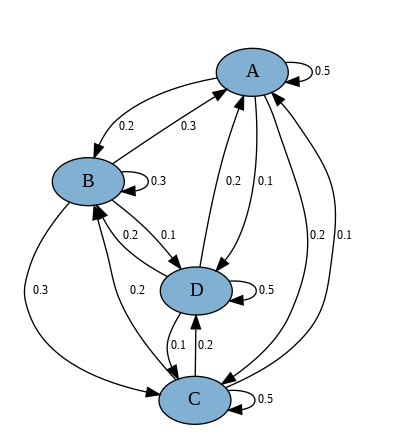

In [15]:
import pydtmc as dtmc
import numpy as np

# Transition matrix for 4 states
A = [[0.5, 0.2, 0.2, 0.1],
     [0.3, 0.3, 0.3, 0.1],
     [0.1, 0.2, 0.5, 0.2],
     [0.2, 0.2, 0.1, 0.5]]

# Create the Markov Chain using PyDTMC
mc = dtmc.MarkovChain(A, ["A", "B", "C", "D"])

dtmc.plot_graph(mc, dpi=600)

### Simuate n-steps

In [16]:
# Create a sequence
n = 20
print(mc.simulate(n, seed=32))

['D', 'A', 'A', 'A', 'C', 'C', 'C', 'C', 'B', 'C', 'D', 'A', 'A', 'C', 'D', 'D', 'D', 'A', 'B', 'B', 'D']


### Plot the sequence distribution

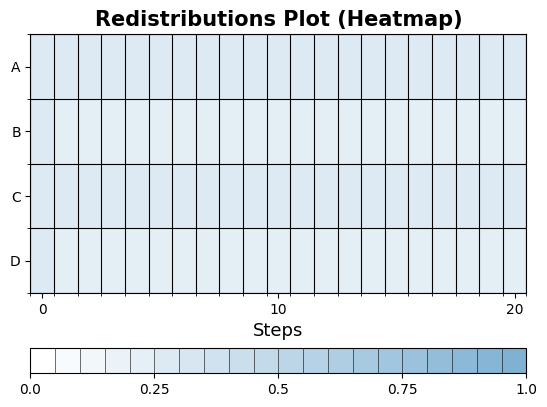

In [17]:
dtmc.plot_redistributions(mc, n, plot_type='heatmap', dpi=100)

### Sequence distribution using projections

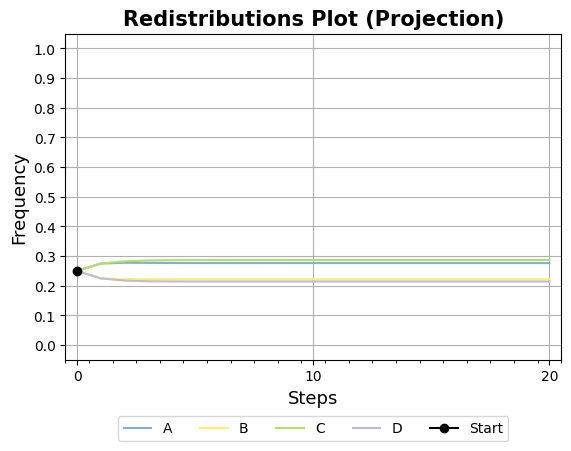

In [18]:
dtmc.plot_redistributions(mc, n, plot_type='projection', dpi=100)

### Using Chapman-Kolmogorov

In [21]:
from numpy.linalg import matrix_power

An = matrix_power(A, n)
print(An)

[[0.27648579 0.22222222 0.2868217  0.21447028]
 [0.27648579 0.22222222 0.2868217  0.21447028]
 [0.27648579 0.22222222 0.28682171 0.21447028]
 [0.27648579 0.22222222 0.28682171 0.21447028]]


## Ergodicity in Markov Chains

1. **Definition**: A discrete-time Markov chain (DTMC) is said to be ergodic if it is both aperiodic and irreducible.

2. **Aperiodicity**: A state in a Markov chain is said to be periodic if it returns to itself in fixed intervals of time. For instance, if a state can only return to itself every 2 steps, 4 steps, 6 steps, etc., then it is said to have period 2. A state is aperiodic if it does not have such fixed intervals. A DTMC is aperiodic if all of its states are aperiodic.

3. **Irreducibility**: A DTMC is irreducible if it is possible to get from any state to any other state in a finite number of steps. In other words, no state is "isolated" from the rest in the long run.

4. **Implications**: If a Markov chain is ergodic, it has some crucial properties:
   - It has a unique stationary distribution. This means that as the chain runs for a long time, the fraction of time spent in each state converges to a fixed set of probabilities, regardless of the initial state of the chain.
   - The time averages equal the ensemble averages. In other words, the average behavior of a single realization of the chain (observing one "run" of the chain over a long time) is the same as the average behavior over many independent realizations starting from different initial states.

5. **Intuitive Understanding**: Think of ergodicity as a concept that ensures mixing and connectedness in the chain. If a chain is ergodic, you can expect that given enough time, you'll visit all states and won't get trapped in cyclical patterns. Moreover, the chain's behavior doesn't depend on where you started—it eventually settles into a predictable pattern described by the stationary distribution.

6. **Applications**: Ergodicity is vital when using Markov chains in applications like statistical mechanics, economics, and computer science. In these contexts, the assumption of ergodicity often allows for simplifications in analyzing long-run behavior.

In summary, when a Markov chain is ergodic, it assures that the system has a predictable long-term behavior (a stationary distribution) and that this behavior is independent of the starting conditions.

In [19]:
# Check if the chain is ergodic
print("Is the chain ergodic?:", mc.is_ergodic)

# Stationary distribution
print("Stationary distribution:", mc.steady_states)

# Eigenvalues
eigenvalues = np.linalg.eigvals(P)
print("Eigenvalues:", eigenvalues)

Is the chain ergodic?: True
Stationary distribution: [array([0.27648579, 0.22222222, 0.28682171, 0.21447028])]
Eigenvalues: [1.  +0.j         0.1 +0.j         0.35+0.08660254j 0.35-0.08660254j]


## Higher-order Markov Models

1. **Basic Concept**: Traditional (first-order) Markov models make predictions based solely on the current state. In other words, the probability of transitioning to a next state depends only on the present state. However, in a higher-order Markov model, the transition probability to a next state depends on a series of $n$ preceding states, not just the current one.

$$
p(\mathbf x_{1:T}) = p(\mathbf x_{1:n})\prod p(\mathbf x_t|\mathbf x_{t-n:t-1})
$$

2. **Order of the Model**: The "order" of a Markov model refers to how many previous states influence the next state's probability. A first-order Markov chain depends on just the current state, a second-order Markov chain depends on the current state and one previous state, a third-order Markov chain depends on the current state and two previous states, and so on.

3. **Transition Matrix Expansion**: As you increase the order of the Markov model, the transition matrix becomes larger. For example, for a second-order Markov chain with $K$ states, the transition matrix would have $K^2$ rows (representing pairs of states) and $K$  columns. This can make the model more computationally intensive and require more data for accurate estimation.

4. **Why Use Higher-order Models?**: Sometimes, the present state alone isn't sufficient to predict the next state accurately. In certain scenarios, like analyzing sequences in bioinformatics, finance, or language modeling, the context provided by several previous states can be crucial for accurate predictions. Higher-order models can capture longer dependencies and patterns in the data.

5. **Trade-offs**: While higher-order models can provide more accurate predictions in some cases, they also come with challenges:
   - **Complexity**: The models become more complex, both in terms of understanding and computation.
   - **Data Requirement**: Estimating the transition probabilities accurately requires more data as the order increases. Sparse data can lead to overfitting, where the model might perform well on the training data but poorly on new, unseen data.
   - **Dimensionality**: As mentioned, the transition matrix grows rapidly in size. This can lead to the "curse of dimensionality" where managing and processing the data becomes challenging.

6. **An Alternative Approach**: Instead of increasing the order of a Markov model, sometimes people turn to other models like Hidden Markov Models (HMMs) or more complex structures like recurrent neural networks (RNNs) to capture longer dependencies in sequences.

In summary, higher-order Markov models consider additional historical states to predict the probability of transitioning to a next state. They can capture longer-term dependencies in sequences but come with the cost of increased complexity and data requirements.

### Conversion of Higher-Order to First-Order with Augmented State Space

1. **Augmented State Space**: The idea is to redefine the state in the Markov model to encapsulate more information. Instead of having the state represent a single observation, it can represent a tuple of observations, effectively "remembering" the past $n$ observations.

2. **Example with n=2**: As example where $n = 2$, the augmented state at time $t$, denoted $\bar{\mathbf x}_t$, is defined as a tuple containing the observations at times $t$ and $t-1$. So, $\bar{\mathbf x}_t = (\mathbf x_{t-1}, \mathbf x_t)$.

3. **First-Order Model with Augmented State**: Using this augmented state space, the transition probabilities can be defined as:
$$
P(\bar{\mathbf x}_{t+1} = (\mathbf x_t, \mathbf x_{t+1}) | \bar{\mathbf x}_t = (\mathbf x_{t-1}, \mathbf x_t))
$$

Here, even though it appears that the transition is based on two observations (making it seem like a second-order model), it's effectively a first-order model in the augmented state space.

4. **Benefits**:
   - **Simplified Analysis**: Tools and techniques designed for first-order Markov models can be directly applied to the transformed model.
   - **Matrix Representation**: The transition matrix for this "first-order" model in the augmented state space is larger, but its structure remains the same as any first-order Markov transition matrix.

5. **Trade-offs**:
   - **Increased State Space**: The state space grows exponentially. If the original state space had $K$ states, the augmented state space for $n = 2$ would have $K^2$ states. This can lead to more complex computations and a potentially sparser transition matrix.
   - **Data Requirement**: To estimate the transition probabilities in this augmented state space reliably, more data might be required.

In summary, this technique allows one to leverage the simplicity and well-understood properties of first-order Markov models while still capturing the dependencies present in higher-order models by redefining the state space.

Creating an augmented transition matrix for a higher-order Markov chain using the transition matrix of a first-order Markov chain requires a systematic approach. Here, I'll guide you through the process for \( n = 2 \) (second-order Markov chain).

Given a first-order Markov chain with a transition matrix \( P \), the goal is to compute the augmented transition matrix \( P' \) for the equivalent first-order Markov chain in the augmented state space.

### Steps to Create Augmented Transition Matrix:

1. **State Representation**: For every pair of states $(i, j)$ in the original state space, there will be a state $ij $ in the augmented state space.

2. **Computing Transition Probabilities**:
  For every possible transition $ij \rightarrow kl $ in the augmented state space, compute the probability $p'_{ijkl} $as:
  $$
  A'_{ijkl} = A(i \rightarrow k | j)
  $$
  Here's the crucial part: This is equivalent to $A(j \rightarrow k)$ since the second-order transition probability from state $i$ followed by state $j$ to state $ k$ is entirely determined by the first-order transition probability from state $j$ to state  $k$. This is why we only need the first-order transition matrix to compute the augmented matrix for a second-order chain.

3. **Fill the Augmented Matrix**:
  For each entry in the augmented matrix, look up the transition probability in the original matrix based on the mapping from the previous step and fill in the value.

### Example:

Let's take a simple example with a 2x2 original matrix:
```
Original Matrix P:
|----|----|
| a  | b  |
|----|----|
| c  | d  |
|----|----|
```

The augmented matrix $A'$ for the second-order chain will be 4x4:
```
Augmented Matrix P':
|----|----|----|----|
| aa | ab | ac | ad |
|----|----|----|----|
| ba | bb | bc | bd |
|----|----|----|----|
| ca | cb | cc | cd |
|----|----|----|----|
| da | db | dc | dd |
|----|----|----|----|
```

For transitions:
  - $aa \rightarrow ab$: $A'_{aa,ab} = b$
  - $ab \rightarrow bc$: $A'_{ab,bc} = c$
  - ... and so on.

Once you complete this for all transitions, you'll have the augmented transition matrix for the second-order chain.

Note: The resulting augmented matrix is essentially block-partitioned where each block corresponds to the original matrix, with the rows in each block representing the second state of the augmented state (the one that determines the next state transition).